<a href="https://colab.research.google.com/github/Vineet179/Wind_Power_Generator/blob/main/dataset3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

try:
    df = pd.read_csv('Location3.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'Location3.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,29.7,55,15.4,4.96,8.46,124,129,8.8,0.3438
1,2017-01-02 01:00:00,29.6,56,15.6,4.97,8.43,120,124,8.5,0.3954
2,2017-01-02 02:00:00,29.8,56,16.1,5.69,9.18,121,123,9.7,0.4471
3,2017-01-02 03:00:00,29.8,58,16.8,5.49,8.88,123,126,9.9,0.4988
4,2017-01-02 04:00:00,30.2,59,17.8,5.19,8.36,124,127,9.4,0.5504


Shape of the DataFrame: (43800, 10)

Data Types:
 Time                    object
temperature_2m         float64
relativehumidity_2m      int64
dewpoint_2m            float64
windspeed_10m          float64
windspeed_100m         float64
winddirection_10m        int64
winddirection_100m       int64
windgusts_10m          float64
Power                  float64
dtype: object

Descriptive Statistics:
        temperature_2m  relativehumidity_2m   dewpoint_2m  windspeed_10m  \
count    43800.000000         43800.000000  43800.000000   43800.000000   
mean        49.225632            68.290708     38.225450       4.334103   
std         22.551070            17.865965     21.901316       2.061304   
min        -26.700000            12.000000    -35.500000       0.000000   
25%         32.000000            55.000000     22.800000       2.730000   
50%         50.300000            70.000000     38.100000       4.050000   
75%         68.400000            83.000000     57.900000       5.600000   


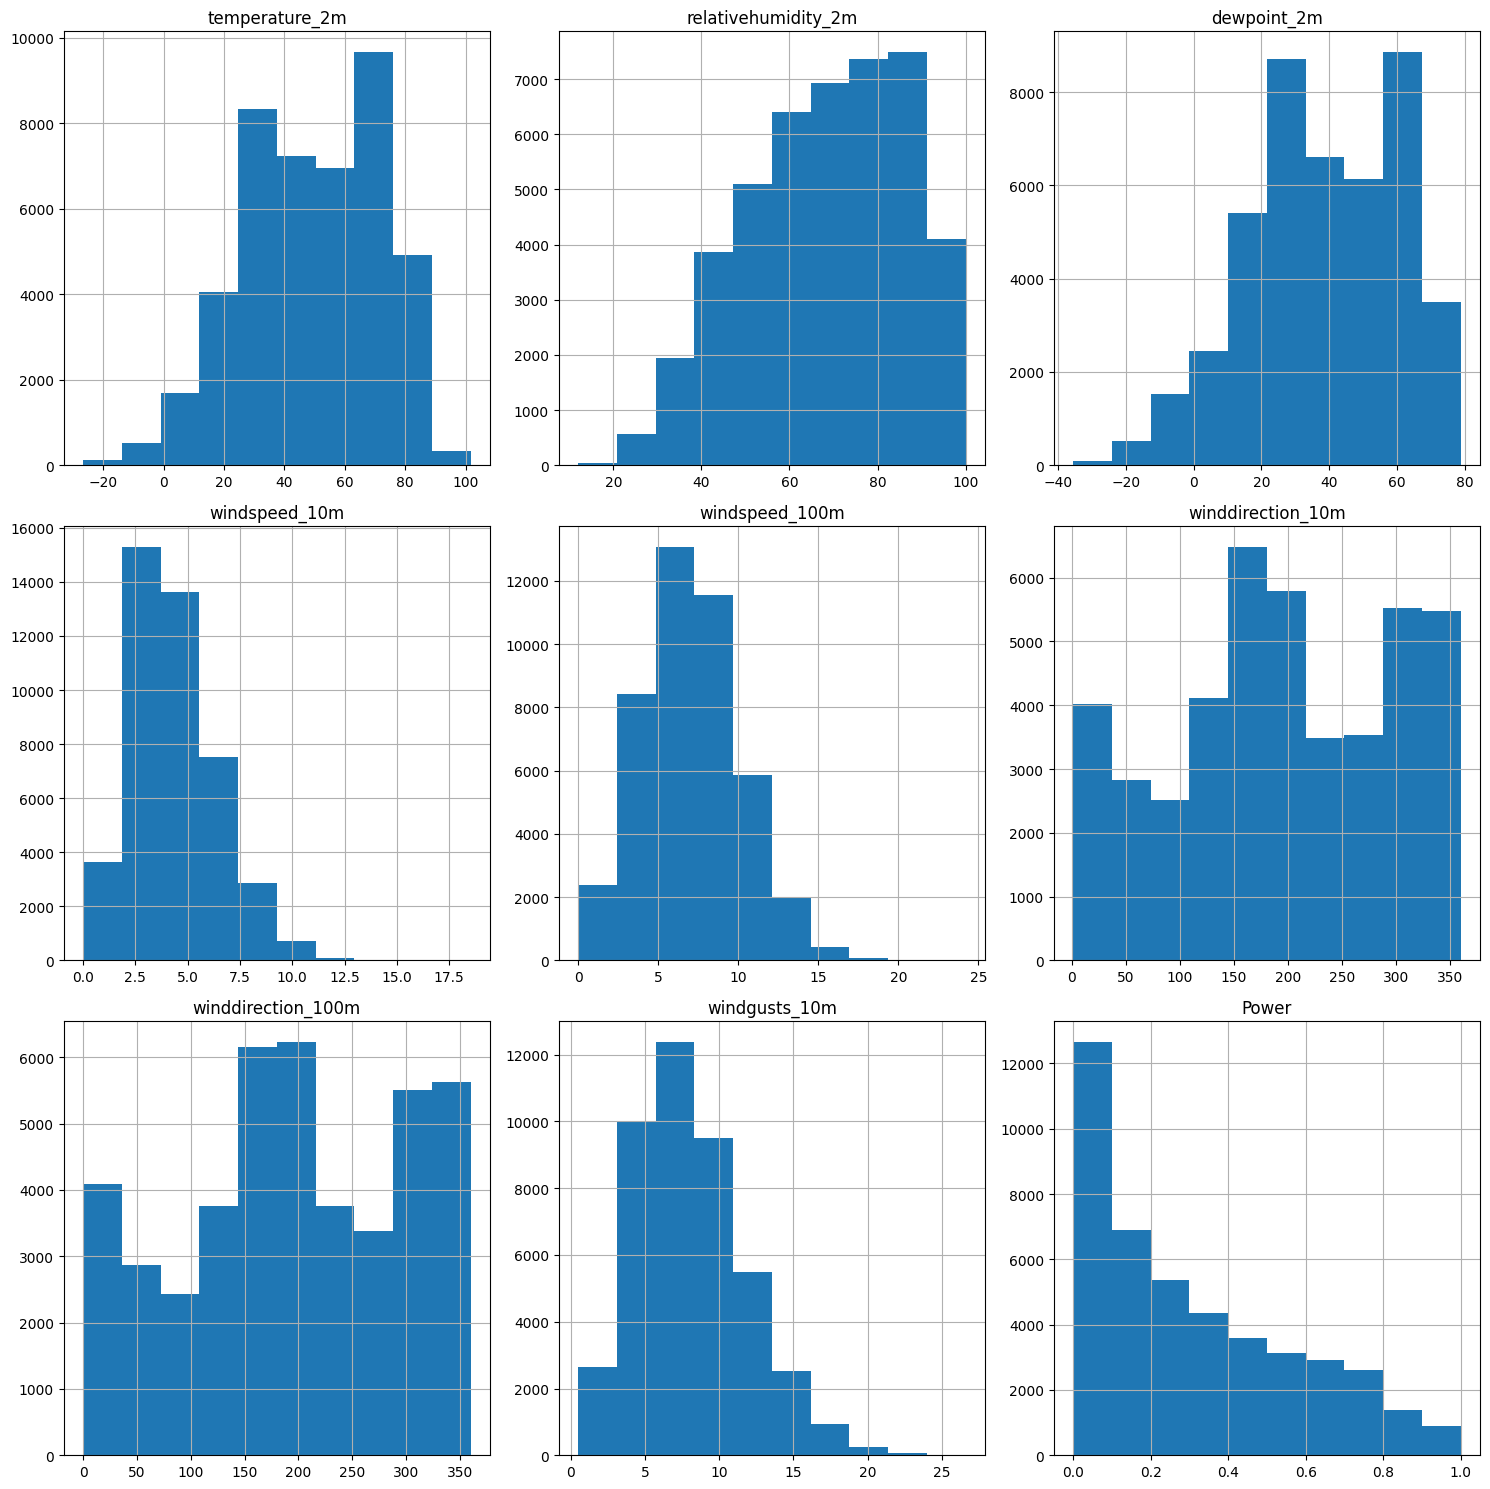

In [2]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Check data types
print("\nData Types:\n", df.dtypes)

# Generate descriptive statistics
print("\nDescriptive Statistics:\n", df.describe())

# Explore categorical features (if any)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nValue counts for {col}:\n{df[col].value_counts()}")

# Initial visualization (histograms for numerical columns)
import matplotlib.pyplot as plt
numerical_cols = df.select_dtypes(include=['number']).columns
num_plots = len(numerical_cols)
fig, axes = plt.subplots(nrows=(num_plots + 2) // 3, ncols=min(num_plots, 3), figsize=(15, 5 * ((num_plots + 2) // 3)))
axes = axes.ravel()  # Flatten the axes array for easier iteration
for i, col in enumerate(numerical_cols):
    df.hist(column=col, ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

Correlation Matrix:


,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
temperature_2m,1.000000,-0.116314,0.940448,-0.031818,-0.089043,-0.137707,-0.135781,0.064080,-0.163390
relativehumidity_2m,-0.116314,1.000000,0.222778,-0.184667,-0.054632,-0.137015,-0.143643,-0.276210,-0.013082
dewpoint_2m,0.940448,0.222778,1.000000,-0.093482,-0.103028,-0.181205,-0.181362,-0.031136,-0.159181
windspeed_10m,-0.031818,-0.184667,-0.093482,1.000000,0.924690,0.125324,0.129717,0.941265,0.500010
windspeed_100m,-0.089043,-0.054632,-0.103028,0.924690,1.000000,0.120385,0.126866,0.823295,0.557336
winddirection_10m,-0.137707,-0.137015,-0.181205,0.125324,0.120385,1.000000,0.915075,0.128824,0.104494
winddirection_100m,-0.135781,-0.143643,-0.181362,0.129717,0.126866,0.915075,1.000000,0.134076,0.110682
windgusts_10m,0.064080,-0.276210,-0.031136,0.941265,0.823295,0.128824,0.134076,1.000000,0.453923
Power,-0.163390,-0.013082,-0.159181,0.500010,0.557336,0.104494,0.110682,0.453923,1.000000


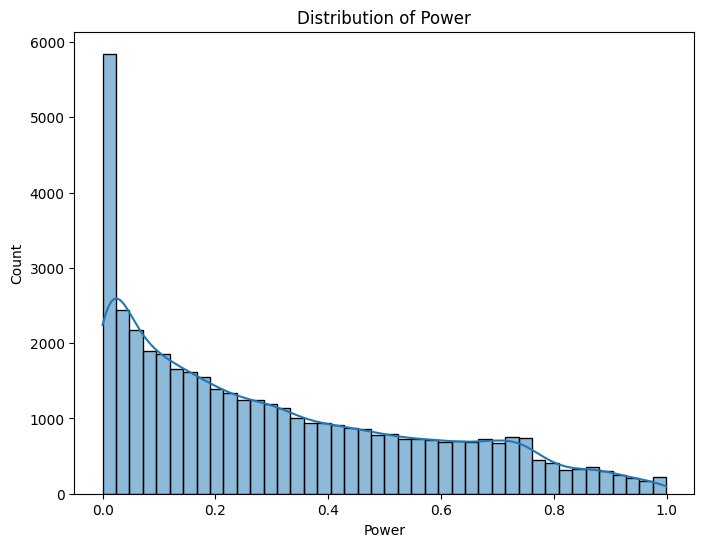

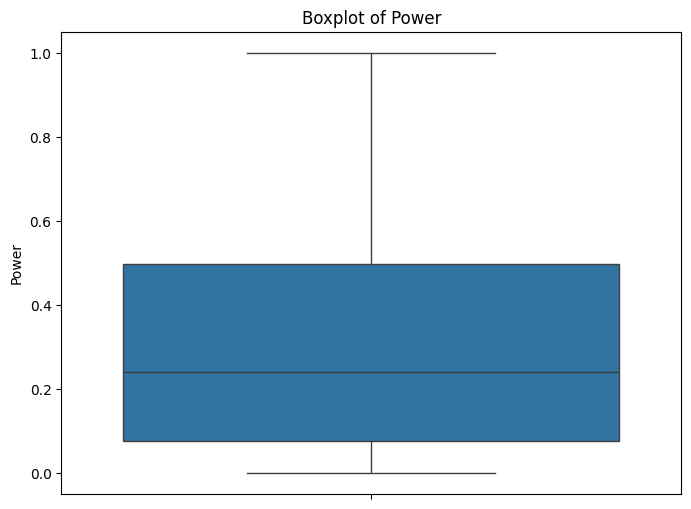

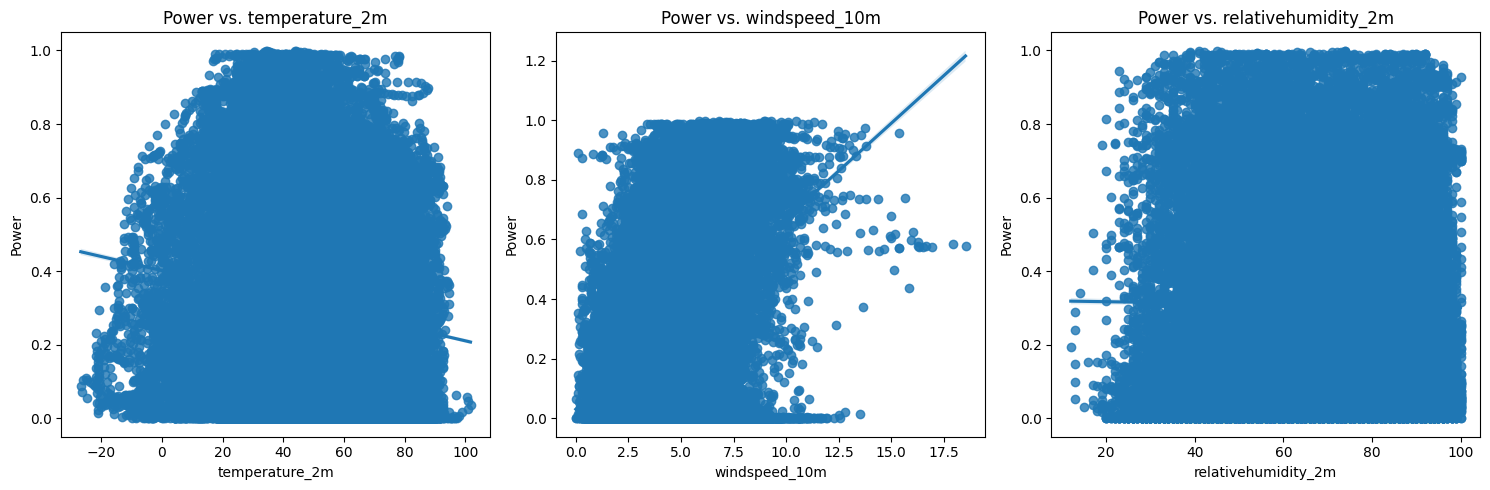

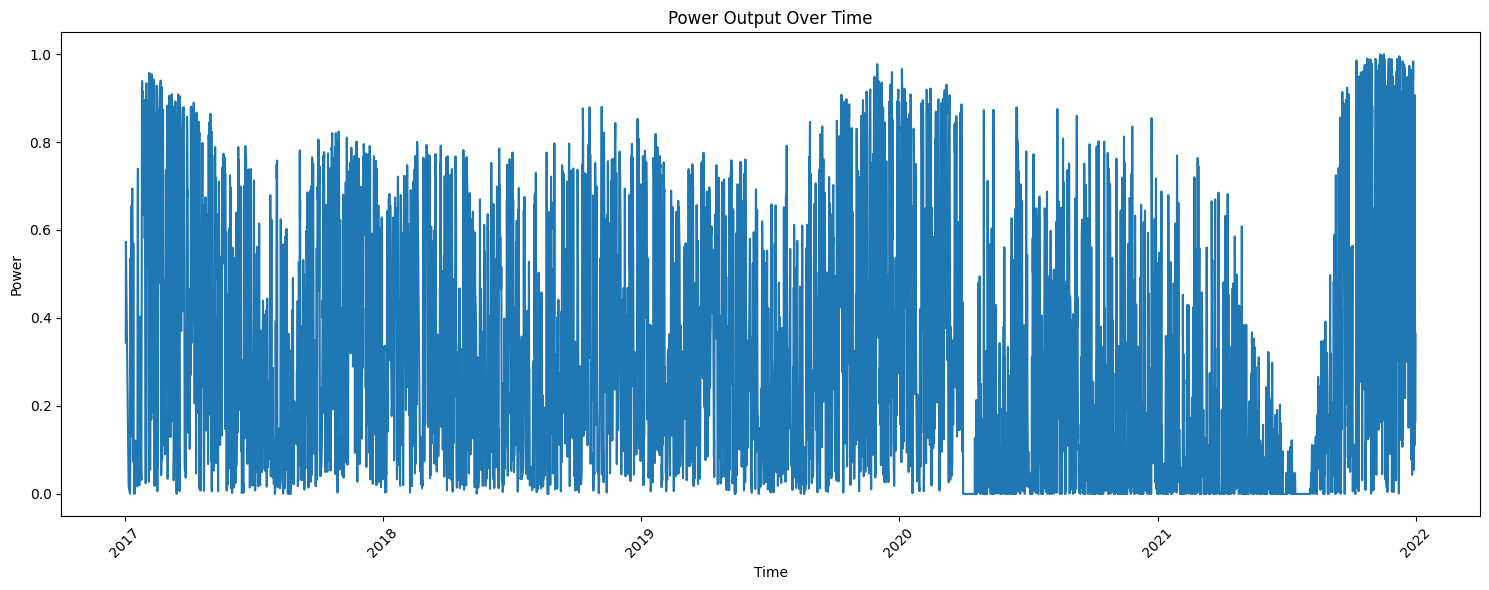

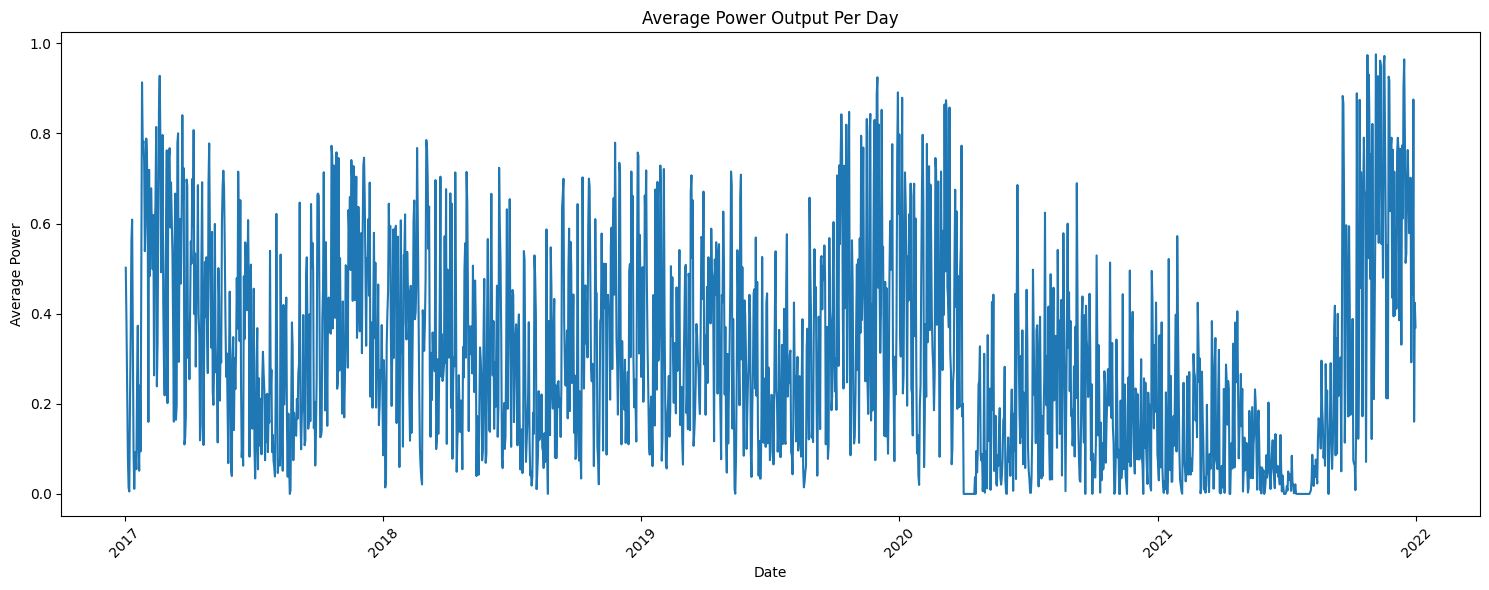

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix, excluding the 'Time' and 'Date' columns
numerical_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_cols].drop(columns=['Date', 'Time'], errors='ignore').corr() # Drop 'Date' and 'Time' columns
print("Correlation Matrix:")
display(correlation_matrix)

# Investigate the distribution of 'Power'
plt.figure(figsize=(8, 6))
sns.histplot(df['Power'], kde=True)
plt.title('Distribution of Power')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Power'])
plt.title('Boxplot of Power')
plt.show()


# Analyze the relationship between 'Power' and other features using scatter plots
features = ['temperature_2m', 'windspeed_10m', 'relativehumidity_2m']
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.regplot(x=feature, y='Power', data=df)
    plt.title(f'Power vs. {feature}')
plt.tight_layout()
plt.show()

# Explore the relationship between 'Power' and 'Time'
df['Time'] = pd.to_datetime(df['Time'])
plt.figure(figsize=(15, 6))
plt.plot(df['Time'], df['Power'])
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Power Output Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analyze average power output per day
# Ensure 'Date' column is of datetime type before grouping
df['Date'] = pd.to_datetime(df['Time']).dt.date
daily_power = df.groupby('Date')['Power'].mean()
plt.figure(figsize=(15, 6))
plt.plot(daily_power.index, daily_power.values)
plt.xlabel('Date')
plt.ylabel('Average Power')
plt.title('Average Power Output Per Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Correlation Matrix:


,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
temperature_2m,1.000000,-0.116314,0.940448,-0.031818,-0.089043,-0.137707,-0.135781,0.064080,-0.163390
relativehumidity_2m,-0.116314,1.000000,0.222778,-0.184667,-0.054632,-0.137015,-0.143643,-0.276210,-0.013082
dewpoint_2m,0.940448,0.222778,1.000000,-0.093482,-0.103028,-0.181205,-0.181362,-0.031136,-0.159181
windspeed_10m,-0.031818,-0.184667,-0.093482,1.000000,0.924690,0.125324,0.129717,0.941265,0.500010
windspeed_100m,-0.089043,-0.054632,-0.103028,0.924690,1.000000,0.120385,0.126866,0.823295,0.557336
winddirection_10m,-0.137707,-0.137015,-0.181205,0.125324,0.120385,1.000000,0.915075,0.128824,0.104494
winddirection_100m,-0.135781,-0.143643,-0.181362,0.129717,0.126866,0.915075,1.000000,0.134076,0.110682
windgusts_10m,0.064080,-0.276210,-0.031136,0.941265,0.823295,0.128824,0.134076,1.000000,0.453923
Power,-0.163390,-0.013082,-0.159181,0.500010,0.557336,0.104494,0.110682,0.453923,1.000000


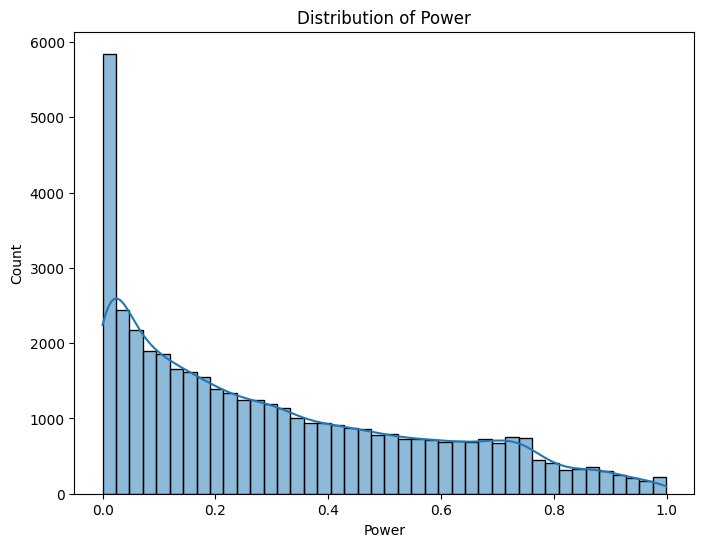

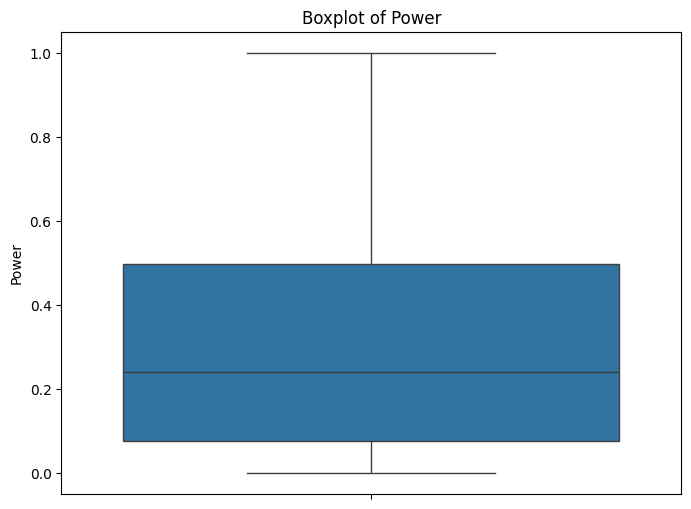

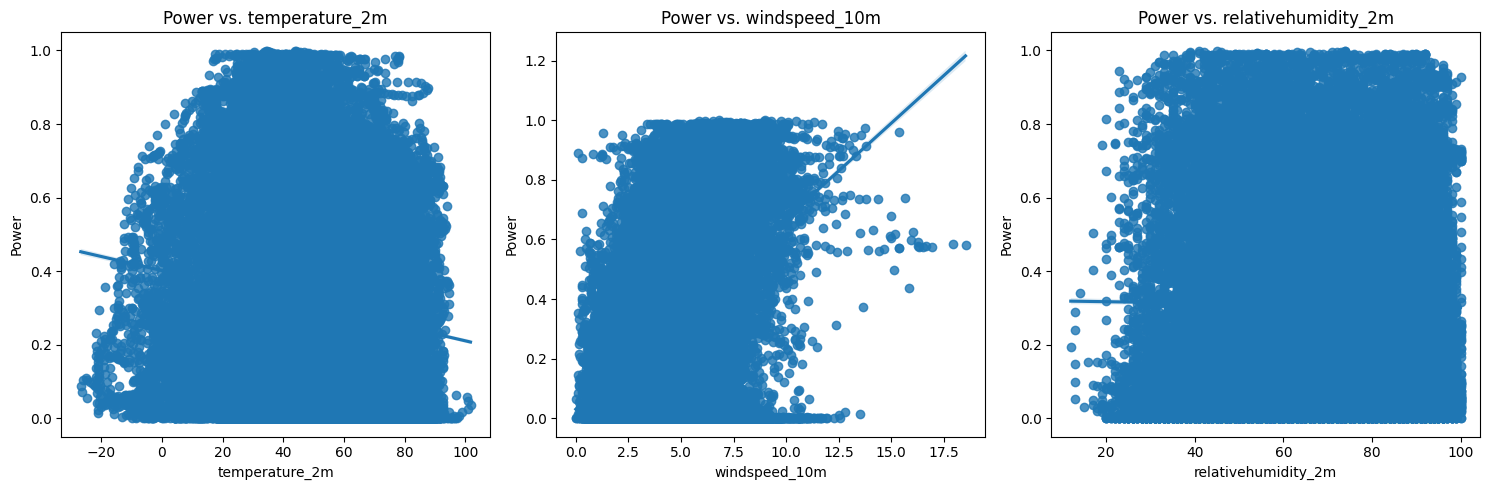

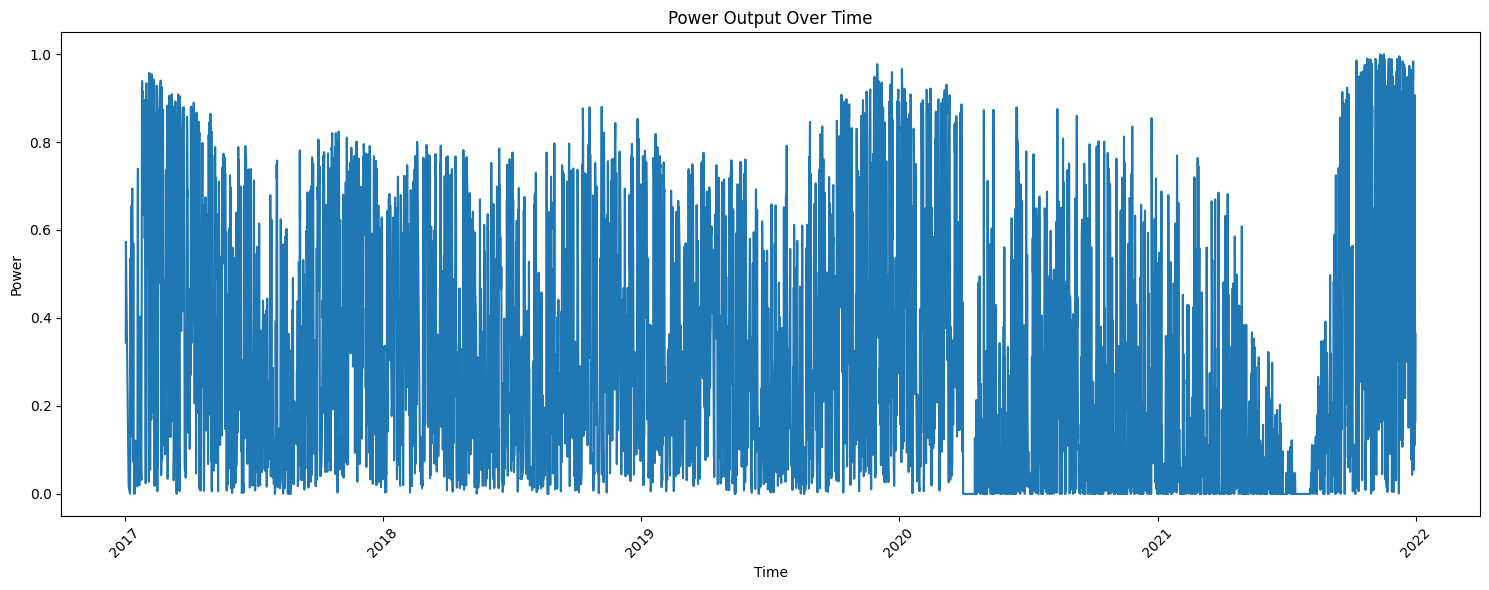

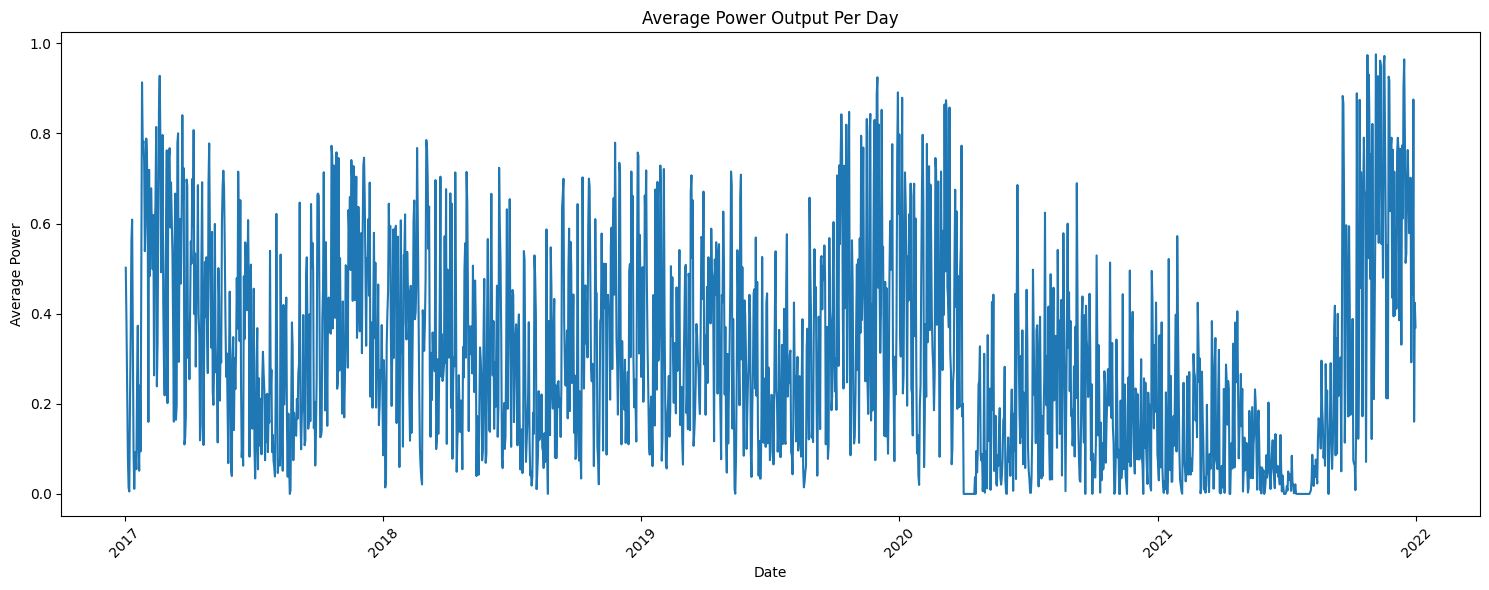

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix, excluding the 'Time' column
numerical_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_cols].corr()
print("Correlation Matrix:")
display(correlation_matrix)

# Investigate the distribution of 'Power'
plt.figure(figsize=(8, 6))
sns.histplot(df['Power'], kde=True)
plt.title('Distribution of Power')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Power'])
plt.title('Boxplot of Power')
plt.show()

# Analyze the relationship between 'Power' and other features
features = ['temperature_2m', 'windspeed_10m', 'relativehumidity_2m']
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.regplot(x=feature, y='Power', data=df)
    plt.title(f'Power vs. {feature}')
plt.tight_layout()
plt.show()

# Explore the relationship between 'Power' and 'Time'
df['Time'] = pd.to_datetime(df['Time'])
plt.figure(figsize=(15, 6))
plt.plot(df['Time'], df['Power'])
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Power Output Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analyze average power output per day
df['Date'] = df['Time'].dt.date
daily_power = df.groupby('Date')['Power'].mean()
plt.figure(figsize=(15, 6))
plt.plot(daily_power.index, daily_power.values)
plt.xlabel('Date')
plt.ylabel('Average Power')
plt.title('Average Power Output Per Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

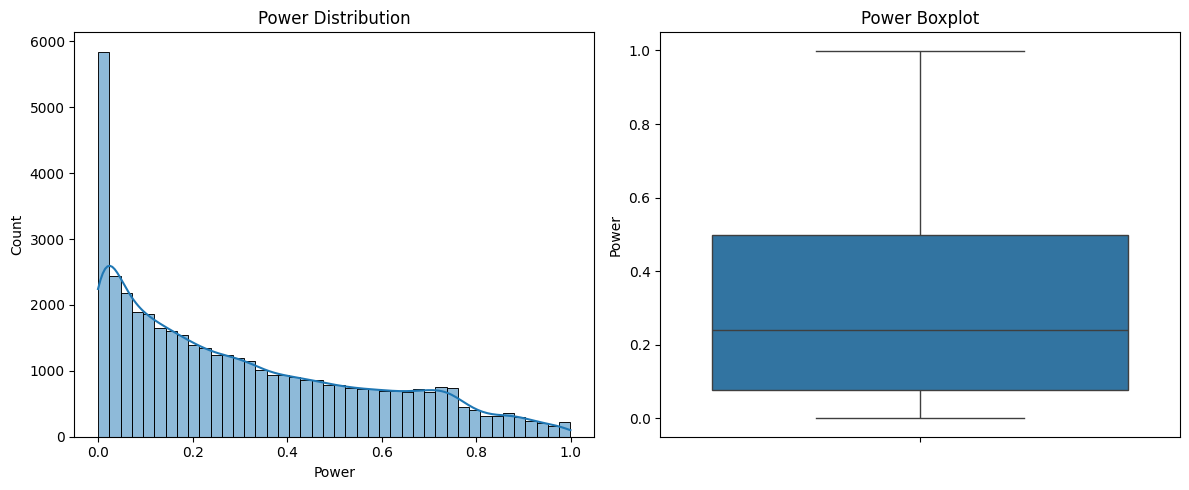

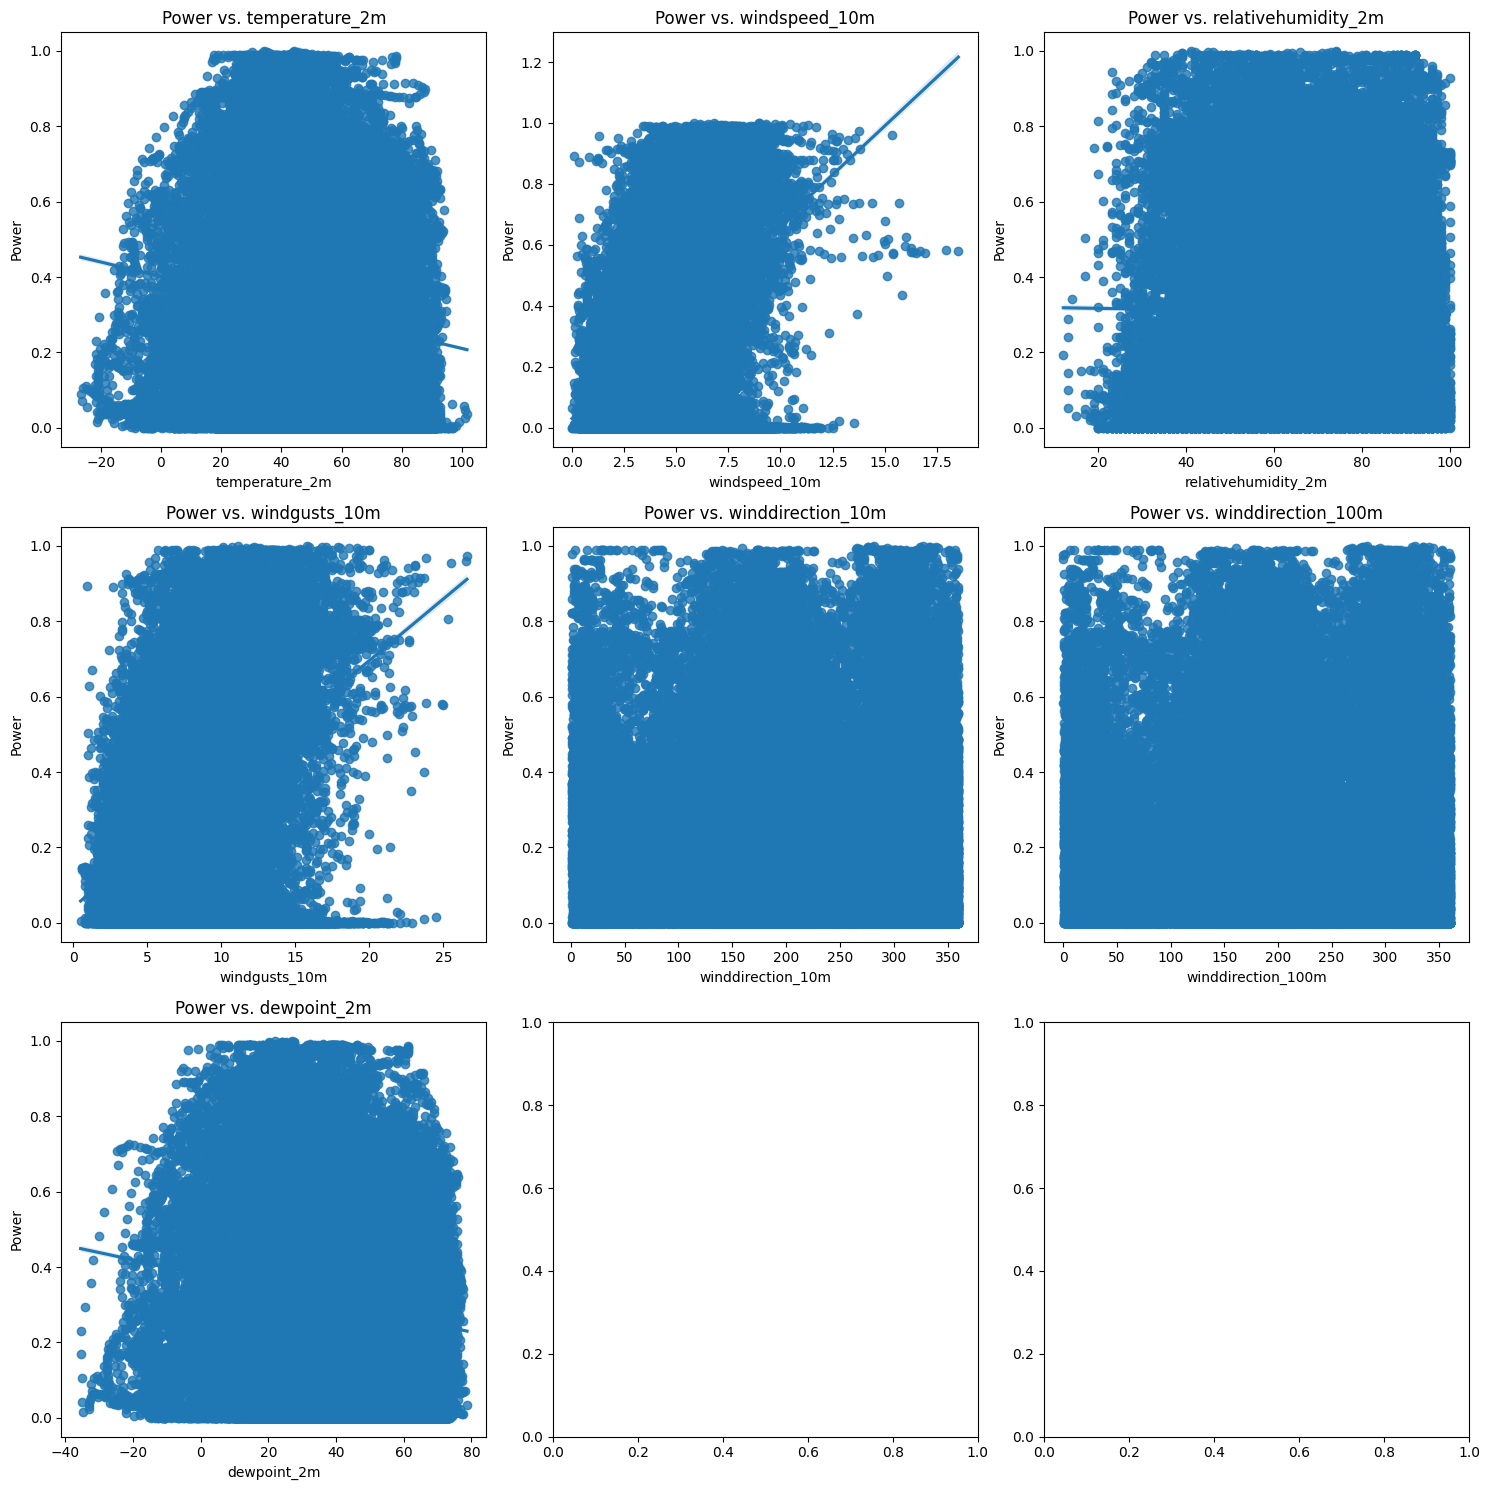

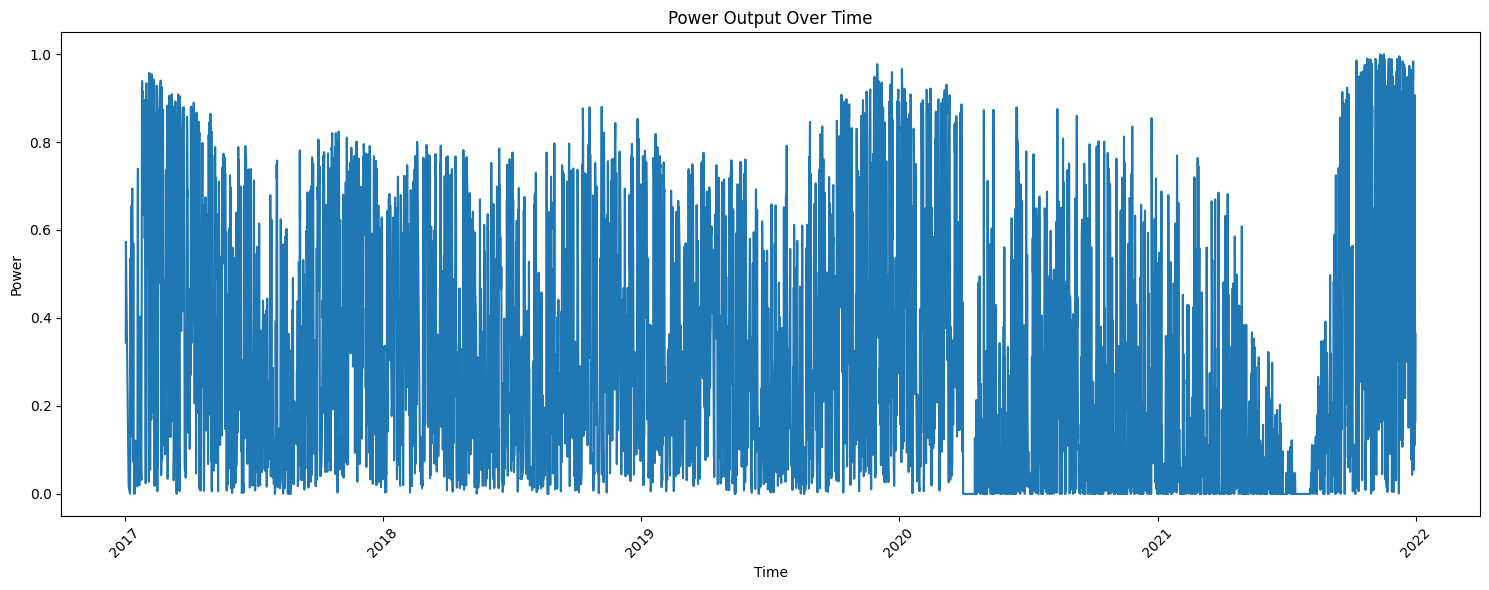

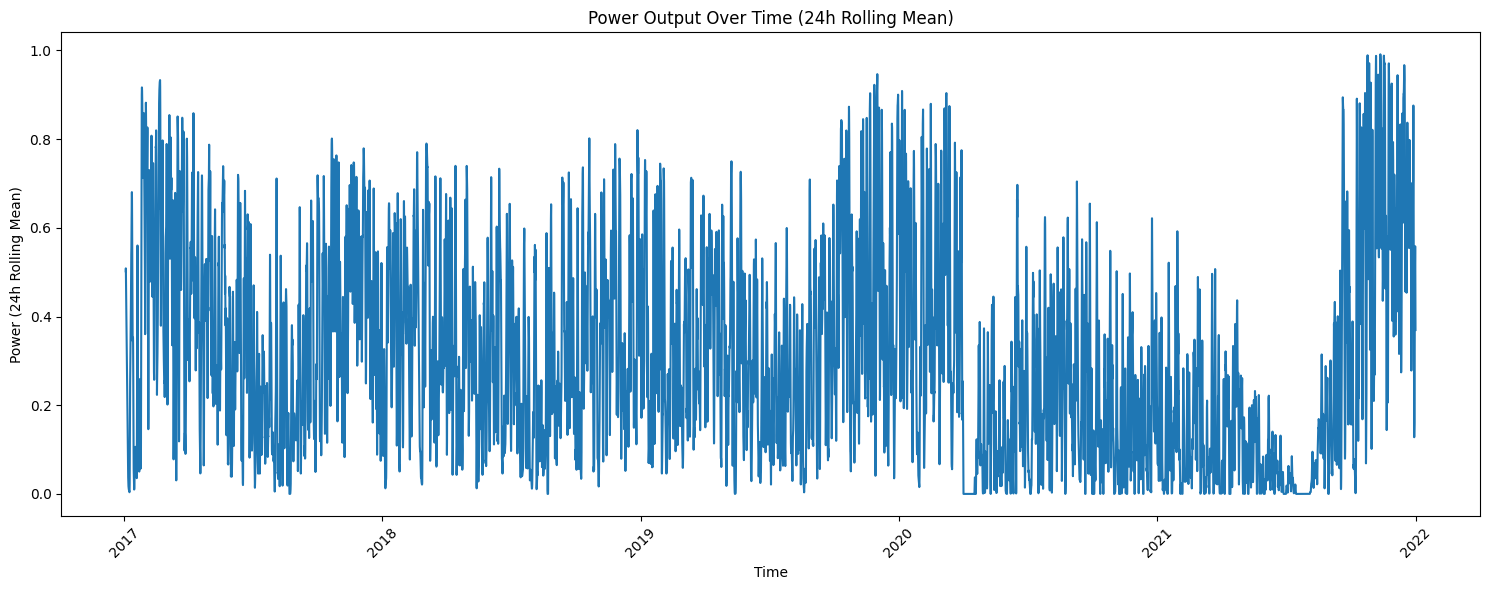

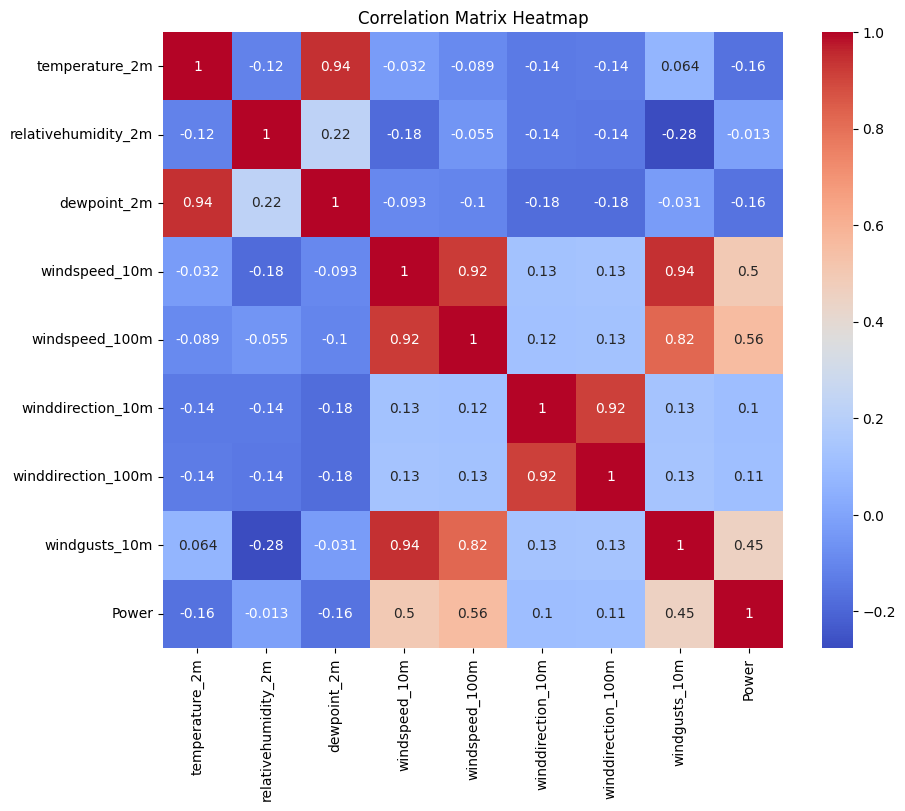

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Power Distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Power'], kde=True)
plt.title('Power Distribution')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Power'])
plt.title('Power Boxplot')
plt.tight_layout()
plt.show()

# Power vs. Key Features
features = ['temperature_2m', 'windspeed_10m', 'relativehumidity_2m', 'windgusts_10m', 'winddirection_10m', 'winddirection_100m', 'dewpoint_2m']
num_plots = len(features)
fig, axes = plt.subplots(nrows=(num_plots + 2) // 3, ncols=min(num_plots, 3), figsize=(15, 5 * ((num_plots + 2) // 3)))
axes = axes.ravel()
for i, feature in enumerate(features):
    sns.regplot(x=feature, y='Power', data=df, ax=axes[i])
    axes[i].set_title(f'Power vs. {feature}')
plt.tight_layout()
plt.show()

# Power over Time
plt.figure(figsize=(15, 6))
plt.plot(df['Time'], df['Power'])
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Power Output Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Rolling Mean of Power over Time
plt.figure(figsize=(15, 6))
plt.plot(df['Time'], df['Power'].rolling(window=24).mean()) #24-hour rolling mean
plt.xlabel('Time')
plt.ylabel('Power (24h Rolling Mean)')
plt.title('Power Output Over Time (24h Rolling Mean)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Pairwise Relationships (Optional)
plt.figure(figsize=(10, 8))
numerical_df = df.select_dtypes(include=['number'])  # Select only numerical columns
correlation_matrix = numerical_df.drop(columns=['Date', 'Time'], errors='ignore').corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()